
**Task Description**
> **By using the Iris Flower Dataset available on Kaggle, and accurately classify the Iris flowers into
their respective species:**

>>1.   Setosa
2.   Versicolor
3.   Virginica










# Libraries

In [1]:
!pip install kaggle

In [79]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


# Loading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [22]:
! cp kaggle.json ~/.kaggle

In [23]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
shutil.copy('/content/kaggle.json', '/root/kaggle.json')

In [25]:
!kaggle datasets download -d arshid/iris-flower-dataset -p /content --force

  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 2.74MB/s]


In [27]:
!unzip iris-flower-dataset.zip

Archive:  iris-flower-dataset.zip
  inflating: IRIS.csv                


# Preprocessing the Dataset

In [65]:
df= pd.read_csv('/content/IRIS.csv')

In [66]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [67]:
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [68]:
df.shape

(150, 5)

In [69]:
df.dropna()
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [70]:
df=df.drop_duplicates()
df.duplicated().sum()

0

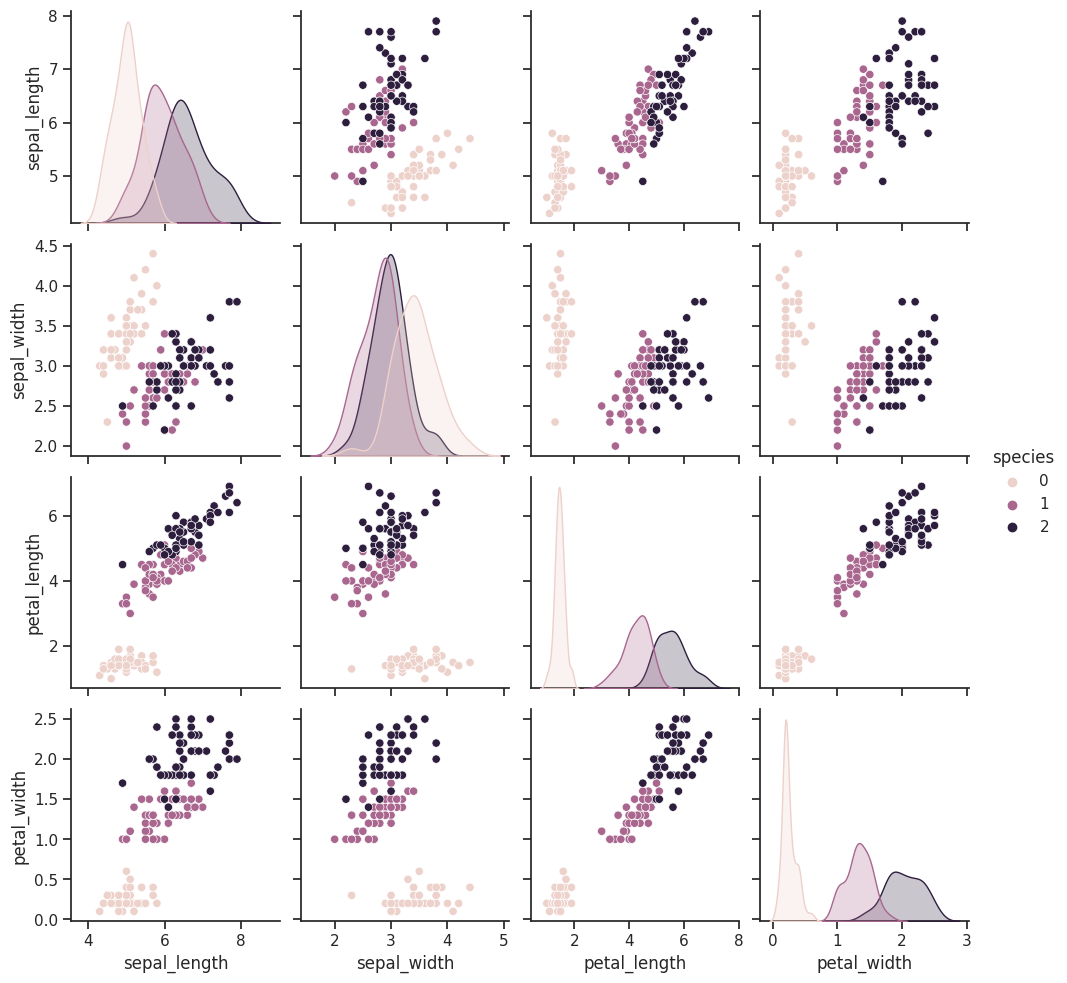

In [84]:
sns.set(style="ticks")
sns.pairplot(df,hue="species",diag_kind="kde")
plt.show()

In [116]:
custom_palette = ["#f7cac9", "#91a8d0", "#ffdcdb"]
sns.set_palette(custom_palette)

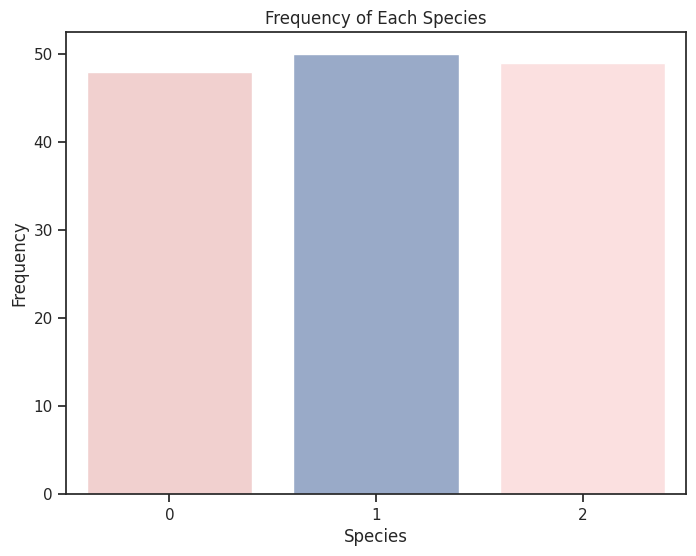

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Each Species')
plt.show()

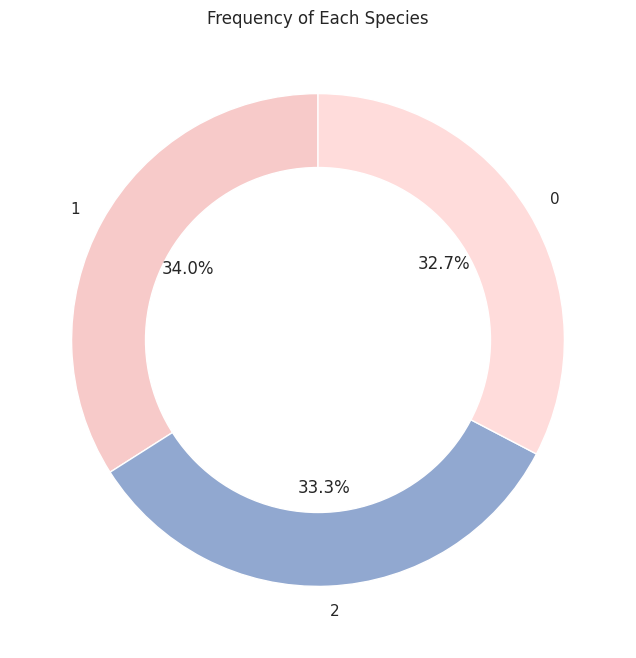

In [119]:
species_counts = df['species'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_palette, wedgeprops={'edgecolor': 'white'})
plt.title('Frequency of Each Species')
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.show()

In [71]:
label_encoder=LabelEncoder()
df.loc[:,'species']=label_encoder.fit_transform(df['species'])

<ipython-input-71-f5f5c7683b7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'species']=label_encoder.fit_transform(df['species'])
<ipython-input-71-f5f5c7683b7c>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'species']=label_encoder.fit_transform(df['species'])


In [72]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[147 rows x 5 columns]>

# Feature Extraction and Training

In [74]:
y=df['species']
X=df.drop(['species'],axis=1)

In [76]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [80]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [81]:
y_pred=model.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred)

0.9666666666666667